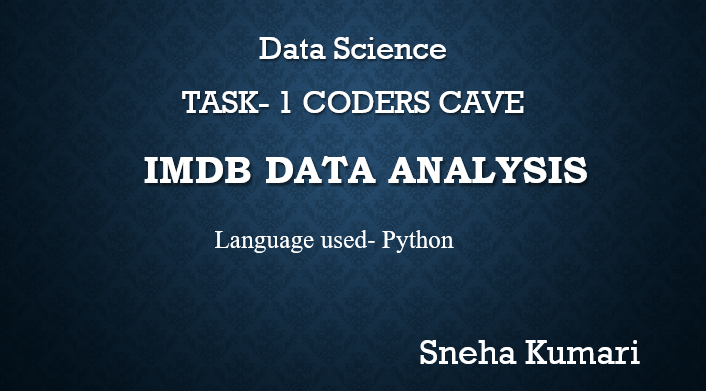

In [41]:
from IPython import display
display.Image("CAVE.png")

In [42]:
#import all required libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [43]:
# read the datset, THIS IS TOP 1000 RATED MOVIES
df=pd.read_csv("imdb.csv")

In [44]:
#Top 5 rows of dataset
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [45]:
#check for dimension of dataset
df.shape

(1000, 16)

In [46]:
#Genral info about dataset
df.info()
#Here non null count and dtype of each row is mention

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


DATA PREPROCESSING

In [47]:
#check for non null values
df.count()

Poster_Link      1000
Series_Title     1000
Released_Year    1000
Certificate       899
Runtime          1000
Genre            1000
IMDB_Rating      1000
Overview         1000
Meta_score        843
Director         1000
Star1            1000
Star2            1000
Star3            1000
Star4            1000
No_of_Votes      1000
Gross             831
dtype: int64

In [48]:
#check for null vaules
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [49]:
#Handle the missing values for certificate & gross columns which are categorical using mode
print(df["Certificate"].mode())
print(df["Gross"].mode())

0    U
Name: Certificate, dtype: object
0    4,360,000
Name: Gross, dtype: object


In [50]:
df["Certificate"].fillna(str(df["Certificate"].mode().values[0]),inplace=True)
df["Gross"].fillna(str(df["Gross"].mode().values[0]),inplace=True)

In [51]:
#Handle the missing values for meta score columns which is numerical using mean
meta_mean=df["Meta_score"].mean()
df["Meta_score"].fillna(meta_mean,inplace=True)

In [52]:
## Chcek if any missing value is left after handling
df.isnull().sum() 

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [53]:
#Check for duplicate value
df.duplicated().sum()

0

In [54]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [55]:
df.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,1000.00000,1.000000e+03
mean,1991.226000,7.949300,77.97153,2.736929e+05
std,23.287018,0.275491,11.36206,3.273727e+05
min,1920.000000,7.600000,28.00000,2.508800e+04
25%,1976.000000,7.700000,72.00000,5.552625e+04
50%,1999.000000,7.900000,77.97153,1.385485e+05
75%,2009.000000,8.100000,85.25000,3.741612e+05
max,2020.000000,9.300000,100.00000,2.343110e+06


In [56]:
df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1564\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Released_Year,IMDB_Rating,Meta_score,No_of_Votes
Released_Year,1.000000,-0.131416,-0.289281,0.241762
IMDB_Rating,-0.131416,1.000000,0.253903,0.494979
Meta_score,-0.289281,0.253903,1.000000,-0.017739
No_of_Votes,0.241762,0.494979,-0.017739,1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1564\3175740257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


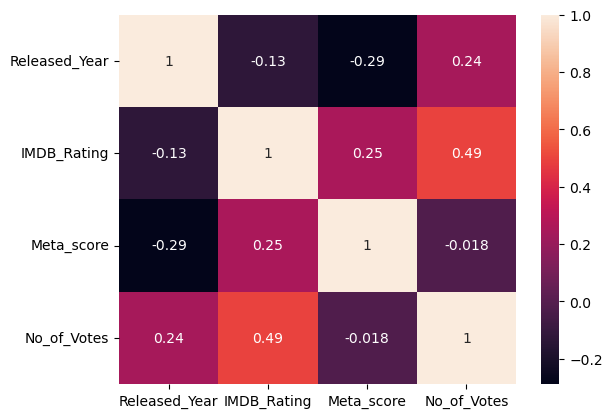

In [57]:
correlation=df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

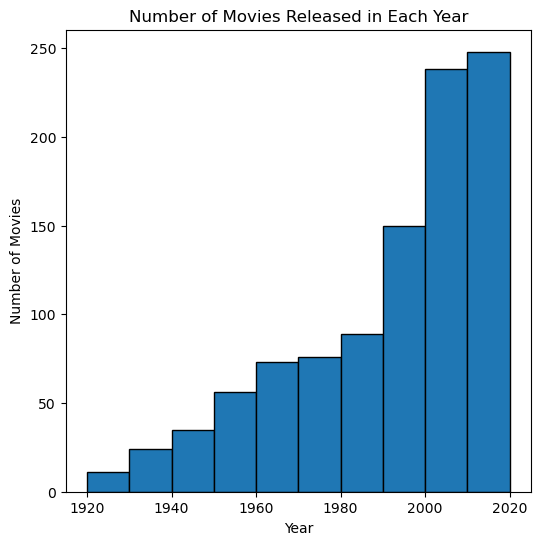

In [58]:
plt.figure(figsize=(6, 6))
plt.hist(df['Released_Year'], edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released in Each Year')
plt.show()

In [59]:
# Convert 'Runtime' column to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

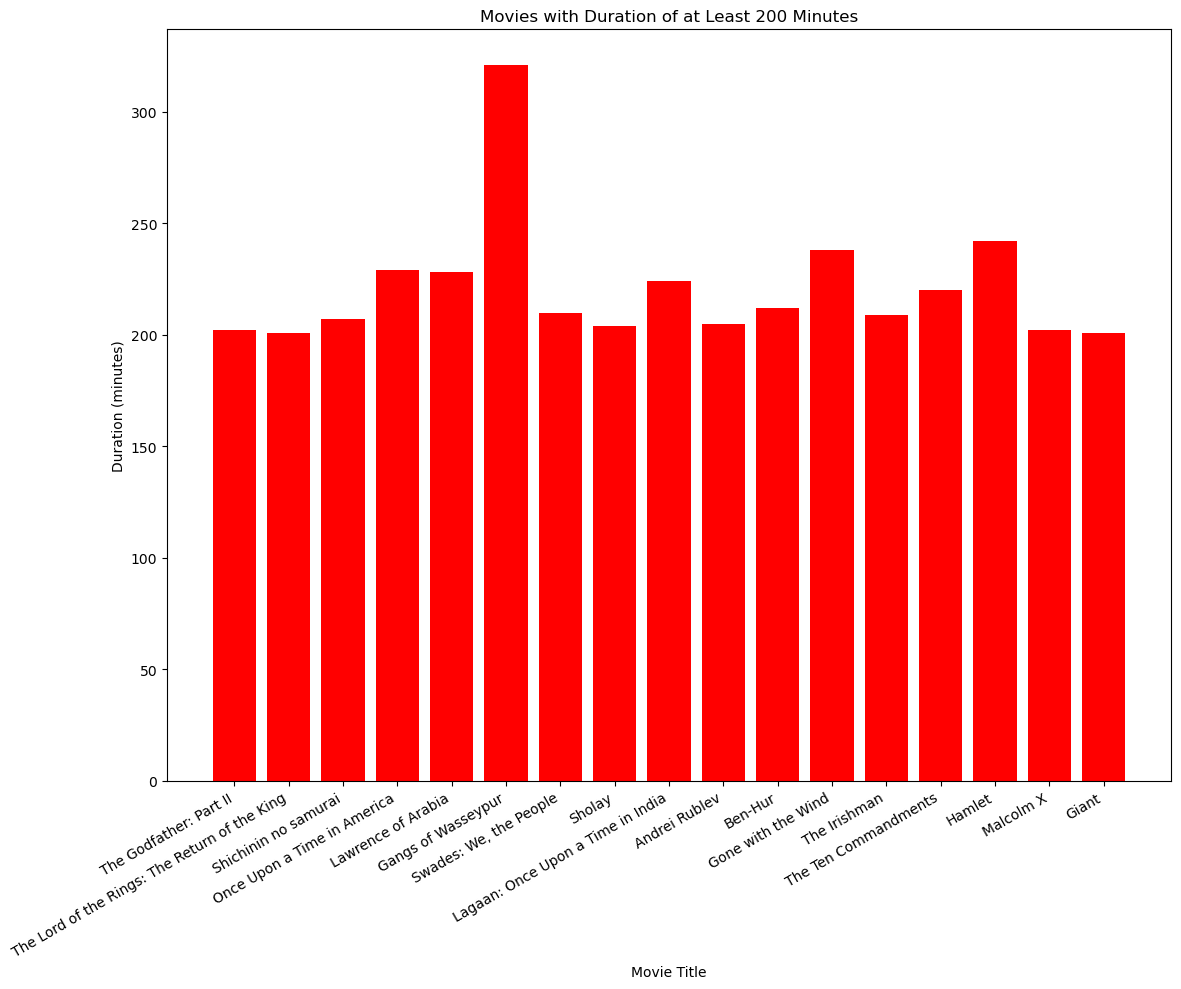

In [60]:
long_duration_movies = df[df['Runtime'] >= 200]
plt.figure(figsize=(12, 10))
plt.bar(long_duration_movies['Series_Title'], long_duration_movies['Runtime'], color='red')
plt.xlabel('Movie Title')
plt.ylabel('Duration (minutes)')
plt.title('Movies with Duration of at Least 200 Minutes')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [61]:
imdb=df[df['IMDB_Rating']>=9]

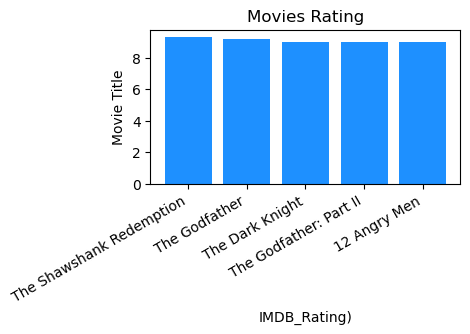

In [62]:
plt.figure(figsize=(4, 2))
plt.bar(imdb['Series_Title'], imdb['IMDB_Rating'], color='dodgerblue')
plt.xlabel('IMDB_Rating)')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Movie Title')
plt.title('Movies Rating')
plt.show()

In [63]:
df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False)

Released_Year
1994    666532.153846
1977    556087.333333
1999    536961.058824
2008    444044.904762
2010    431661.173913
            ...      
1928     38940.500000
1947     37204.500000
1945     34575.000000
1937     33829.000000
1932     33714.500000
Name: No_of_Votes, Length: 99, dtype: float64

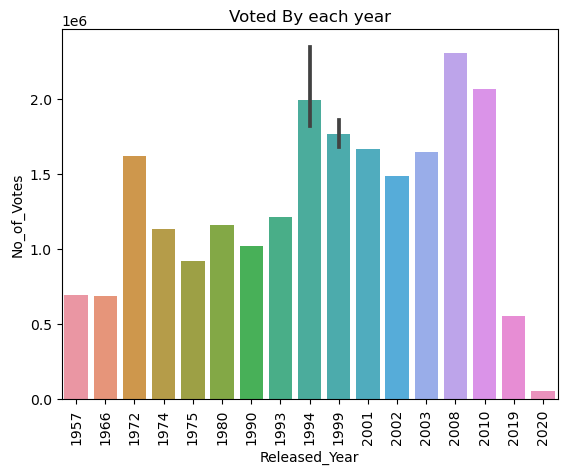

In [64]:
sns.barplot(x='Released_Year',y='No_of_Votes',data=df.head(20))
plt.title("Voted By each year")
plt.xticks(rotation=90)
plt.show()

Show avergae rate for each director

In [65]:
df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)


Director
Frank Darabont     8.95
Irvin Kershner     8.70
Lana Wachowski     8.70
George Lucas       8.60
Roberto Benigni    8.60
                   ... 
Eric Bress         7.60
Ted Demme          7.60
Neil Burger        7.60
Bennett Miller     7.60
Mary Harron        7.60
Name: IMDB_Rating, Length: 548, dtype: float64

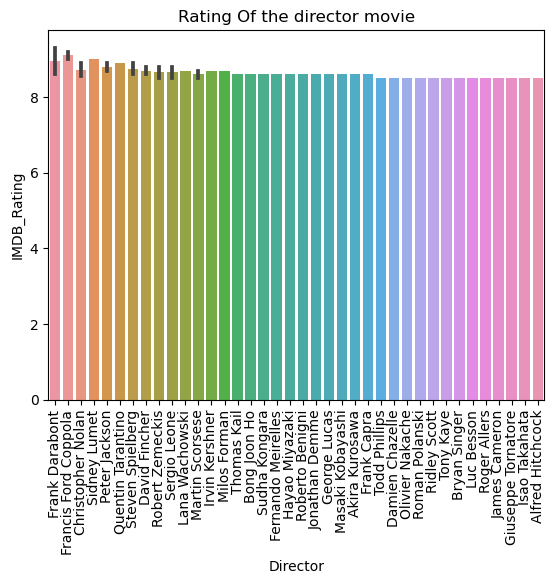

In [66]:
sns.barplot(x='Director',y='IMDB_Rating',data=df.head(50))
plt.title("Rating Of the director movie")
plt.xticks(rotation=90)
plt.show()

In [67]:
# Convert 'Gross' column to numeric
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [68]:
top_gross_movies = df.nlargest(10, 'Gross')

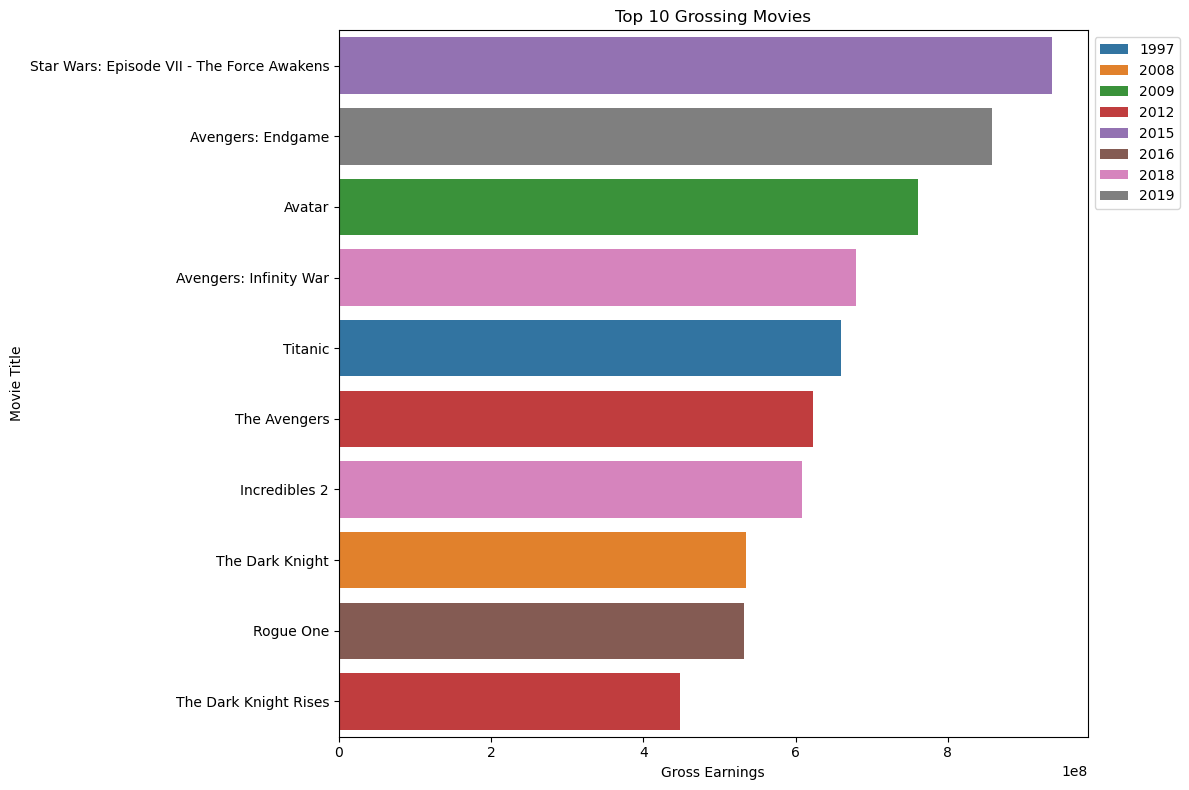

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_gross_movies, x='Gross', y='Series_Title', hue='Released_Year', dodge=False)
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Title')
plt.title('Top 10 Grossing Movies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.tight_layout()
plt.show()

In [70]:
# Convert 'Meta_score' column to numeric
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')


In [71]:
high_meta_score_movies = df[df['Meta_score'] > 97]

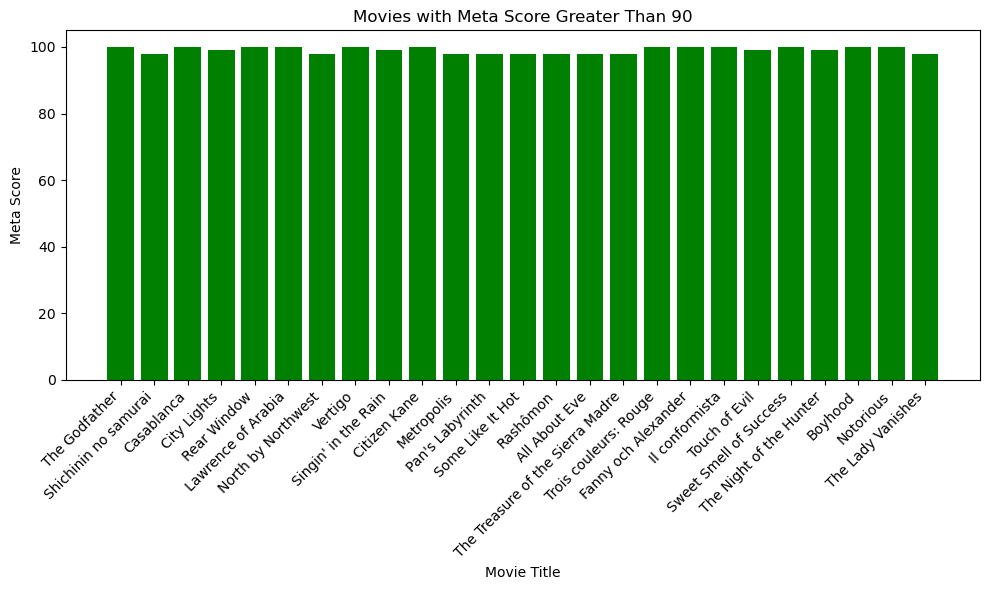

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(high_meta_score_movies['Series_Title'], high_meta_score_movies['Meta_score'], color='green')
plt.xlabel('Movie Title')
plt.ylabel('Meta Score')
plt.title('Movies with Meta Score Greater Than 90')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
# Convert 'IMDB_Rating' column to numeric
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'])

In [74]:
high_imdb_rating_movies = df[df['IMDB_Rating'] > 8.5]

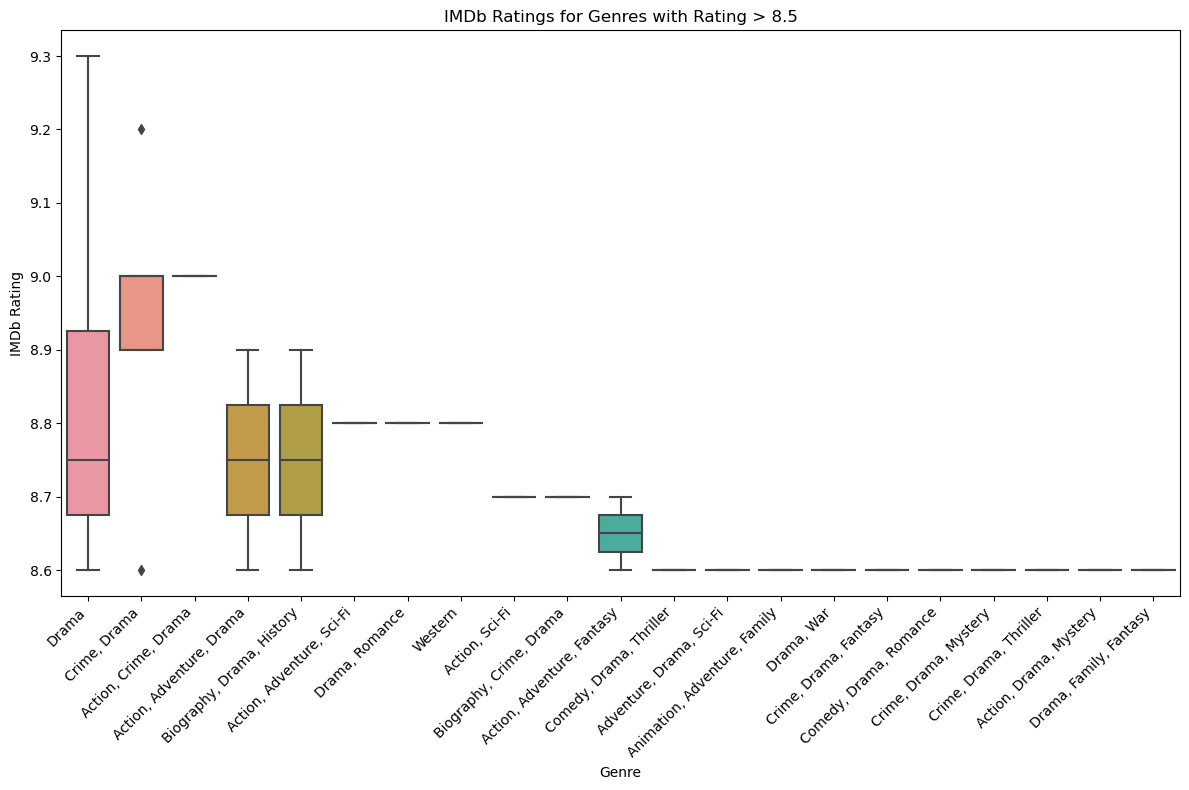

In [75]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=high_imdb_rating_movies, x='Genre', y='IMDB_Rating')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.title('IMDb Ratings for Genres with Rating > 8.5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

In [77]:
certificate_counts = df['Certificate'].value_counts()


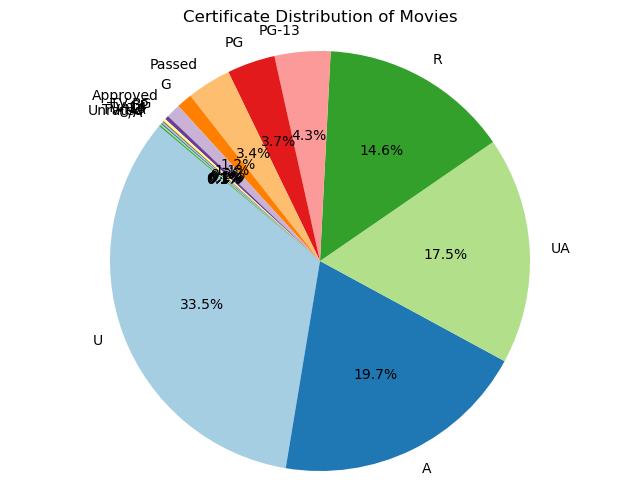

In [78]:
plt.figure(figsize=(8, 6))
plt.pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Certificate Distribution of Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

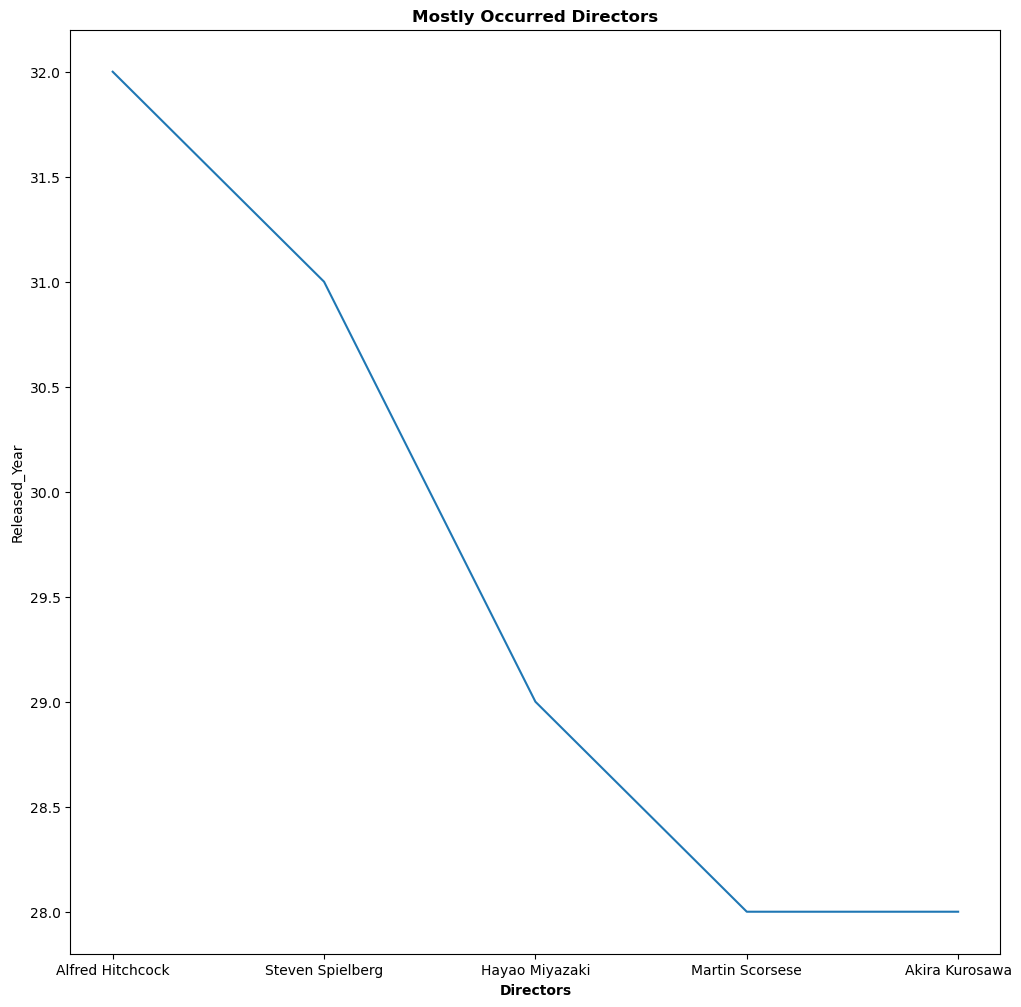

In [79]:
plt.figure(figsize=(12,12))
g=sns.lineplot(x=df['Director'].value_counts()[:5].index,y=df['Released_Year'].value_counts()[:5])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

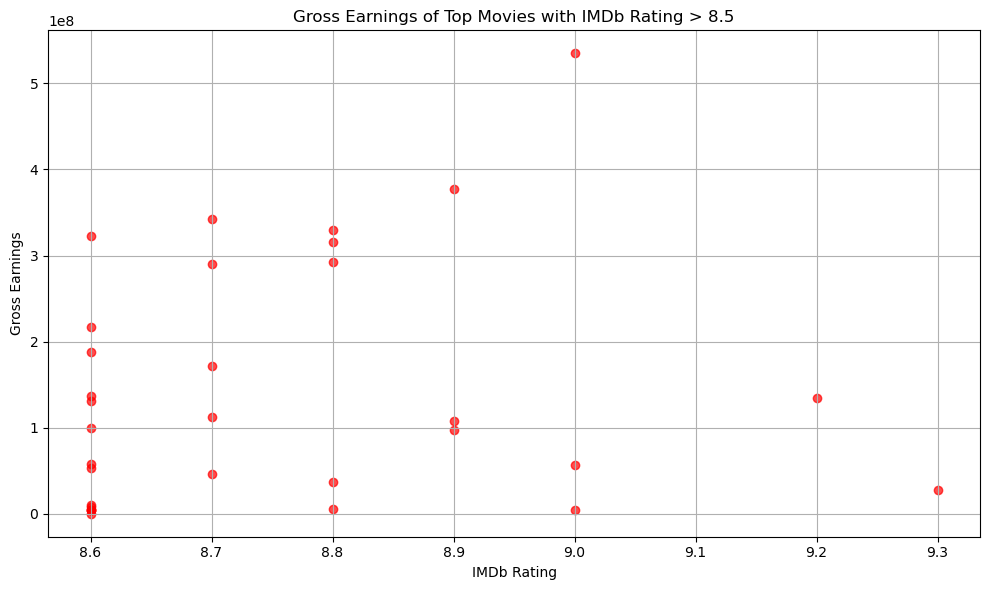

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(high_imdb_rating_movies['IMDB_Rating'], high_imdb_rating_movies['Gross'], color='red', alpha=0.7)
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings')
plt.title('Gross Earnings of Top Movies with IMDb Rating > 8.5')
plt.grid(True)
plt.tight_layout()
plt.show()
